# **word2vec implementation for political leanings**

https://rare-technologies.com/deep-learning-with-word2vec-and-gensim/

https://www.kaggle.com/datasets/umbertogriffo/googles-trained-word2vec-model-in-python/code?datasetId=12162&sortBy=voteCount

In [3]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.matutils import corpus2csc
from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud
import matplotlib.pyplot as plt

import re
import contractions
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split


In [4]:
# Load dataset
df = pd.read_csv("./data/2017_1.csv")
print(df.shape)
df.head()

(146718, 10)


,id,date_publish,outlet,headline,lead,body,authors,domain,url,political_leaning
0,55171935,2017-01-01 00:00:00,Los Angeles Times,Afghan refugees coming to California struggle ...,NaN,California's capital has emerged as a leading ...,Associated Press,www.latimes.com,http://www.latimes.com/local/lanow/la-me-ln-af...,LEFT
1,55208434,2017-01-01 00:00:00,NBC News,Minimum Wages Will Rise in Nearly Two Dozen St...,"Twenty-two states, plus the District of Columb...",Play Facebook\nTwitter\nGoogle Plus\nEmbed Tru...,Emma Margolin,www.nbcnews.com,http://www.nbcnews.com/news/us-news/minimum-wa...,CENTER
2,55172357,2017-01-01 00:00:00,Los Angeles Times,Fire engulfs Long Beach apartment unit; man fo...,NaN,A man was found dead as a fire engulfed an apa...,Rong-Gong Lin Ii,www.latimes.com,http://www.latimes.com/local/lanow/la-me-ln-lo...,LEFT
3,115892789,2017-01-01 00:00:00,ABC News,Obama Boosted White House Technology; Trump Se...,Obama Boosted White House Technology; Trump Se...,As Barack Obama began preparing to leave offic...,Abc News,abcnews.go.com,http://abcnews.go.com/Technology/wireStory/oba...,CENTER
4,4375253,2017-01-01 00:00:00,Fox News,Most residents evacuated by sinkhole could ret...,The new public works commissioner in a suburba...,The new public works commissioner in a suburba...,NaN,www.foxnews.com,http://www.foxnews.com/us/2017/01/01/most-resi...,RIGHT


In [5]:
#lemmatization and removing stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def preprocess(text):
    def is_english_word(word):
        """Function to filter out non-English words."""
        return bool(re.match(r'^[a-zA-Z]+$', word))
    text = text.lower()
    editorials_to_exclude = ["cnn", "fox", "reuters"]
    for editorial in editorials_to_exclude:
        text = re.sub(r"\b" + re.escape(editorial) + r"\b", "", text, flags=re.IGNORECASE)
    text = contractions.fix(text)
    words = word_tokenize(text)
    words = [
            lemmatizer.lemmatize(word) 
            for word in words 
            if word not in stop_words and is_english_word(word)
        ]
    words = [re.sub(r'[^\w\s]', '', token) for token in words if re.sub(r'[^\w\s]', '', token)]
    words = [word for word in words if word]
    return words[:5000]

# Create Word2Vec Corpus for headline and body
class MyCorpus:
    def __init__(self, texts):
        self.texts = texts

    def __iter__(self):
        for text in self.texts:
            yield preprocess(text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ALEJANDRO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ALEJANDRO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ALEJANDRO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
#Define label maps
id2label = {0:"UNDEFINED" ,1:"LEFT",2:"RIGHT",3:"CENTER"}
label2id = {"UNDEFINED": 0, "LEFT": 1, "RIGHT": 2, "CENTER": 3}

# Encoding the label column
df['target']=df['political_leaning'].map(label2id)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['headline', 'body']], df['target'] , test_size=0.2)

headline = X_train['headline']
body = X_train['body']

In [7]:
# Create Word2Vec model for headline and body separately
headline_corpus = MyCorpus(headline)
body_corpus = MyCorpus(body)

In [ ]:
#headline_model = Word2Vec(sentences=headline_corpus) #,vector_size=100, window=5, min_count=1, workers=4)
#body_model = Word2Vec(sentences=body_corpus) #,vector_size=100, window=5, min_count=1, workers=4)
#headline_model.save('./models/headline_model_2017_1')
#body_model.save('./models/body_model_2017_1')


#headline_model = Word2Vec.load('./models/headline_model_2017_1')
#body_model = Word2Vec.load('./models/body_model_2017_1')

headline_model = Word2Vec.load('./models/word2vec_headline_2017_1')
body_model = Word2Vec.load('./models/word2vec_body_2017_1')

In [11]:
for index, word in enumerate(headline_model.wv.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(headline_model.wv.index_to_key)} is {word}")

word #0/7511 is trump
word #1/7511 is say
word #2/7511 is new
word #3/7511 is police
word #4/7511 is u
word #5/7511 is china
word #6/7511 is democrat
word #7/7511 is shooting
word #8/7511 is house
word #9/7511 is johnson


In [12]:
vector_Trump = headline_model.wv['trump']
print(vector_Trump)

vector_Abortion = headline_model.wv['abortion']
print(vector_Trump)

[-0.23621343  0.5588298   1.0639862   0.7338476  -1.3328978  -0.76352423
  1.0223908   1.0434754  -1.1593715  -1.4590918  -0.02130332 -0.63248694
 -0.29205066  0.39341184 -0.06686885 -0.6607305  -0.18078555 -0.81055516
 -0.9686098  -1.0866123   0.5679266  -0.10103698  0.38636175 -0.11508201
  0.91785574 -0.2707614  -0.6655892  -0.7865302  -0.42855644 -0.02422994
  0.5267489   0.08513602  0.9773339  -0.40863198 -0.31036752 -0.43154317
  0.08038933 -0.13861135  0.6648701  -1.6355922  -0.65199125  0.42474964
 -0.33817884 -1.0887312   0.40016732 -0.96495116 -0.6474386   0.9960312
  0.28885627  0.9045181  -0.2319657   0.28747377 -0.8146021  -0.12373182
  1.4399049   0.04235739  0.62652963 -0.29913715 -0.0625103  -0.5651552
 -0.0801535   0.28509325  0.8167734  -0.37255585 -1.0319288   0.02282464
  0.1132651   0.15808469 -1.7160755   0.33634555  0.04026137  0.5215255
 -0.8488244  -0.19243087  0.8214432   0.46829167  0.35988465  0.59451866
 -1.1775525  -0.31898856  0.38611266 -0.3585861   0.27

In [13]:
from sklearn.manifold import TSNE
import random

# Retrieve the weights from the model. This is used for initializing the weights
# in a Keras Embedding layer later
w2v_weights = headline_model.wv.vectors
vocab_size, embedding_size = w2v_weights.shape

print("Vocabulary Size: {} - Embedding Dim: {}".format(vocab_size, embedding_size))

# Some validation on the quality of the Word2Vec model
print(headline_model.wv.most_similar('trump', topn=3))
print(headline_model.wv.most_similar('biden', topn=3))
print(headline_model.wv.most_similar('abortion', topn=3))
print(headline_model.wv.most_similar(positive=['trump', 'biden'], topn=3))

Vocabulary Size: 7511 - Embedding Dim: 100
[('pelosi', 0.7955543398857117), ('lawmaker', 0.7479172945022583), ('dems', 0.7463430762290955)]
[('walsh', 0.9306176900863647), ('arpaio', 0.9298465251922607), ('kamala', 0.8947139978408813)]
[('temporarily', 0.9445445537567139), ('allows', 0.9336304664611816), ('enforcement', 0.926886260509491)]
[('walsh', 0.9102848768234253), ('arpaio', 0.89388507604599), ('scarborough', 0.8578024506568909)]


In [14]:
def word2token(word):
    try:
        return headline_model.wv.vocab[word].index
    except KeyError:
        return 0
def token2word(token):
    return headline_model.wv.index_to_key[token]

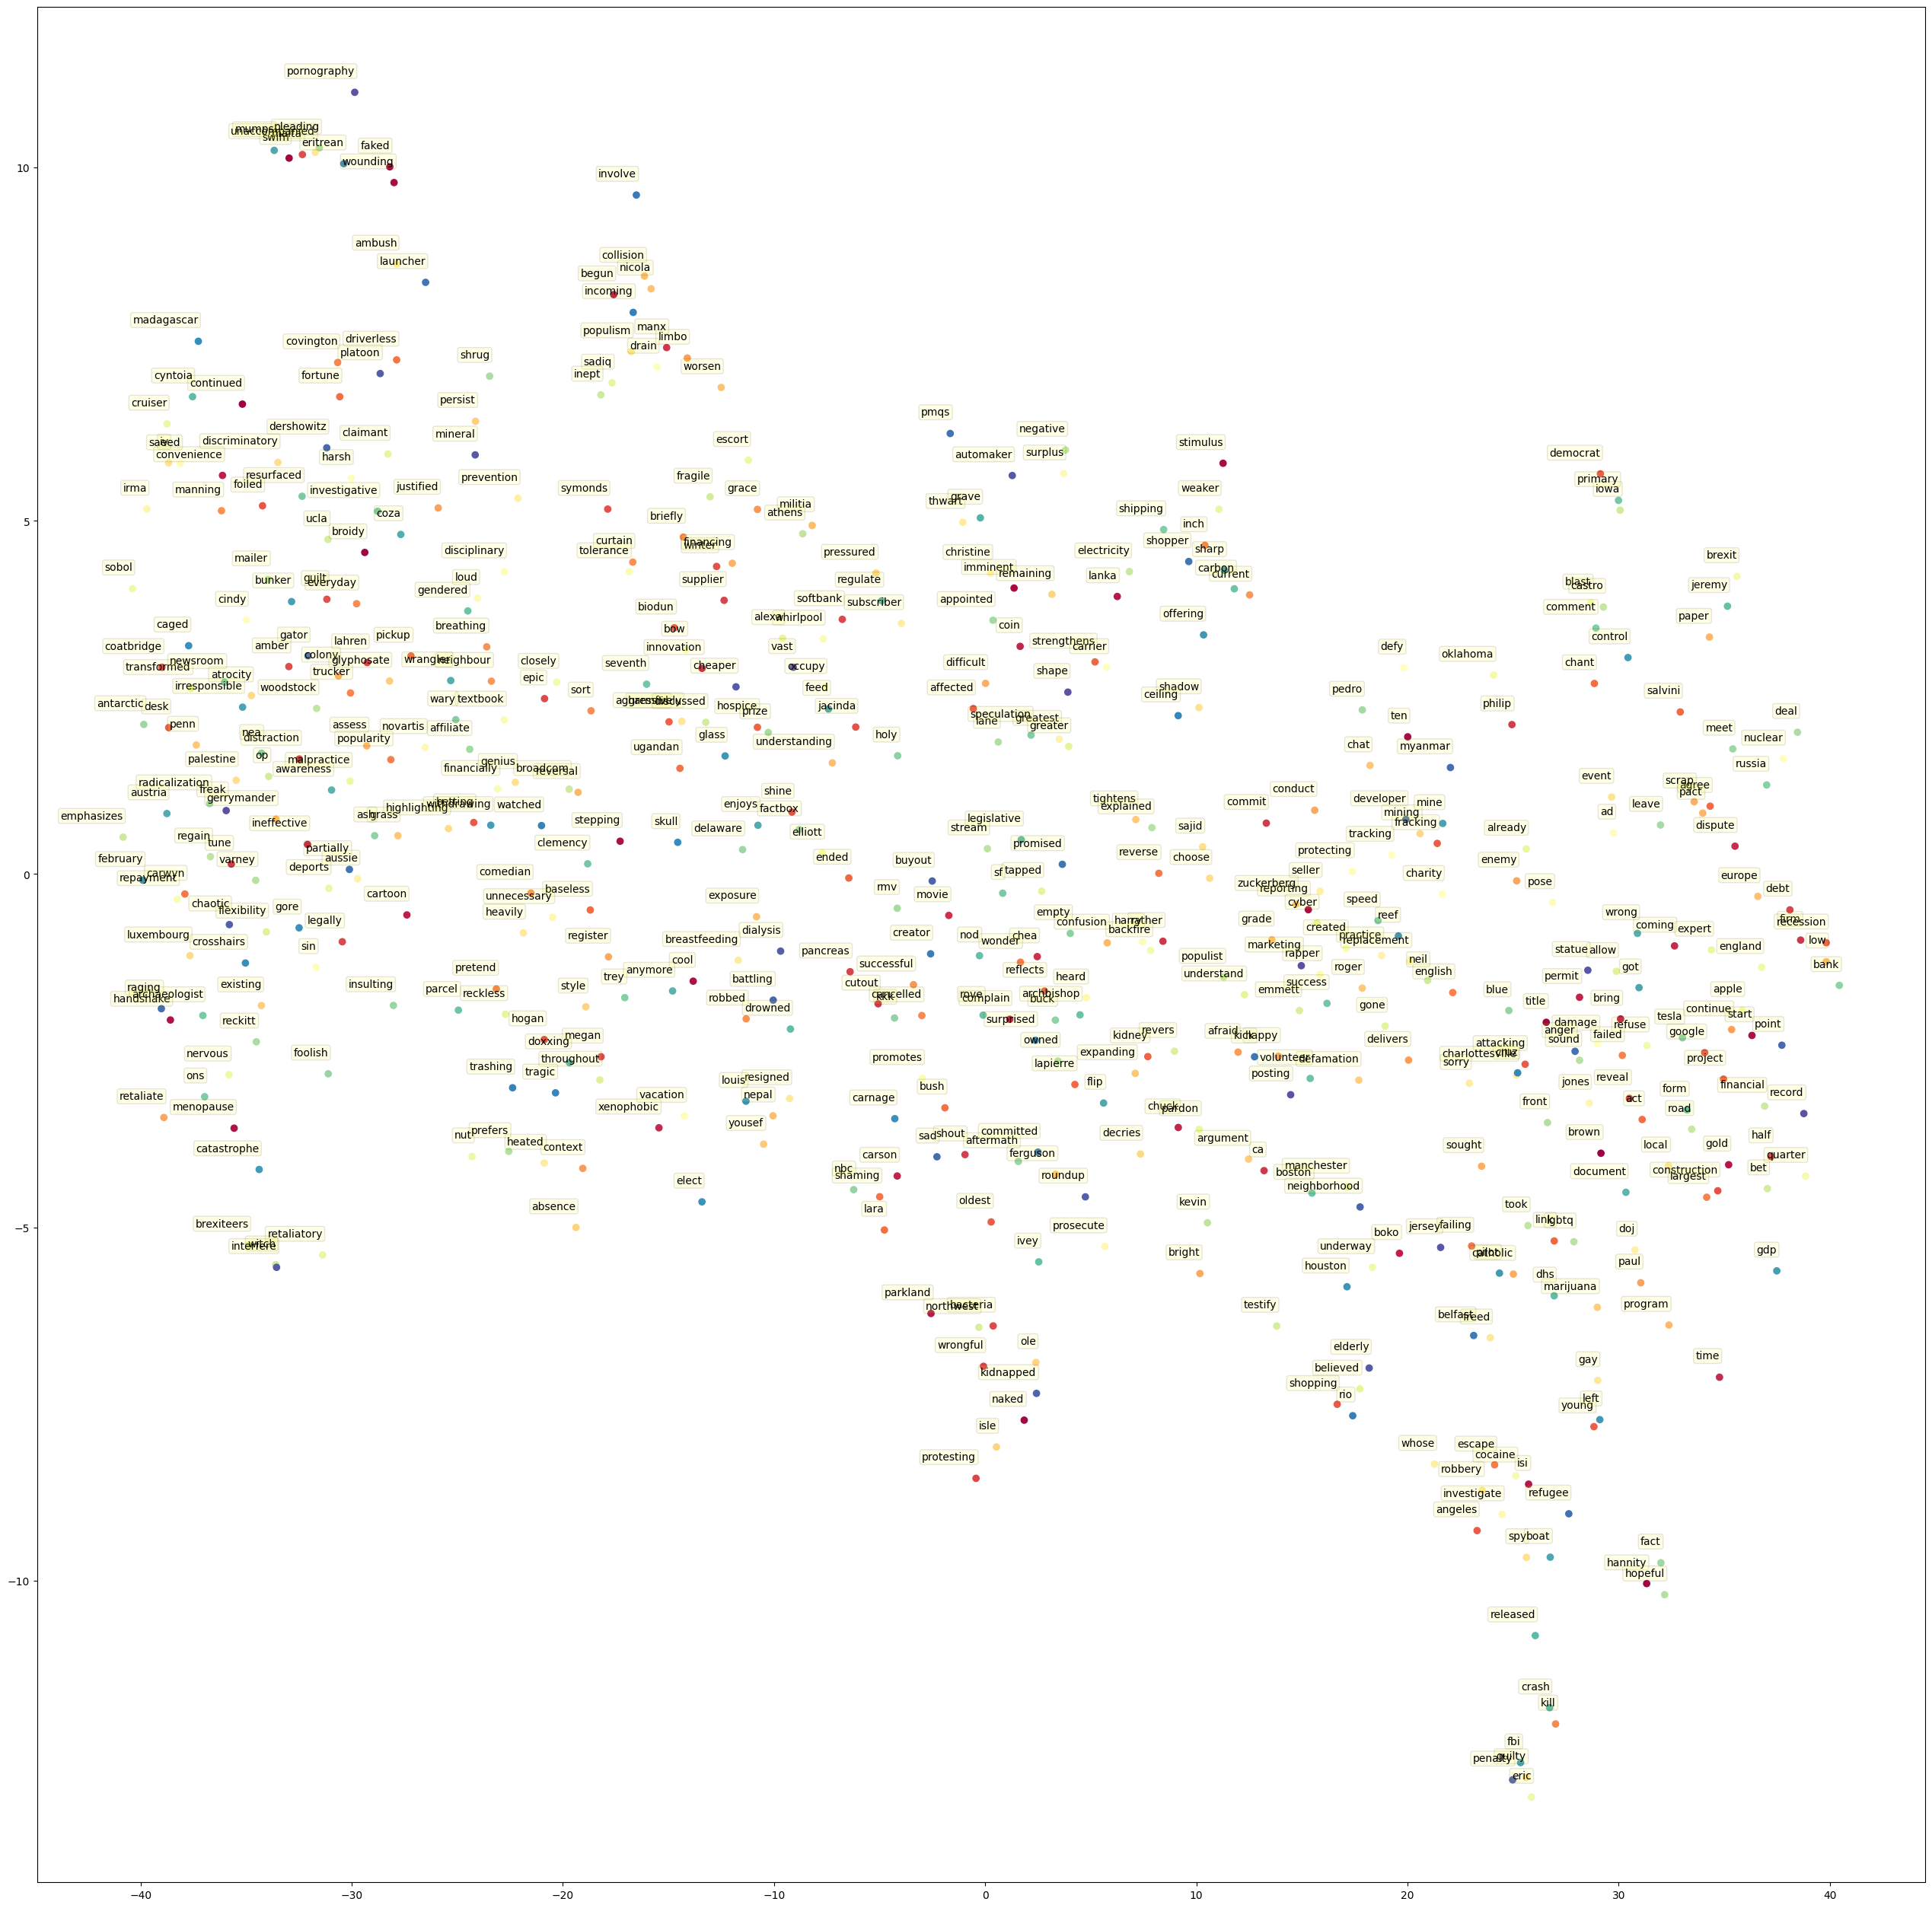

In [15]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import random

# Number of samples
n_samples = 500

# Sample random words from model dictionary
random_i = random.sample(range(vocab_size), n_samples)
random_w = [token2word(i) for i in random_i]

# Generate Word2Vec embeddings of each word
word_vecs = np.array([headline_model.wv[w] for w in random_w])

# Apply t-SNE to Word2Vec embeddings, reducing to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
tsne_e = tsne.fit_transform(word_vecs)

# Plot t-SNE result
plt.figure(figsize=(32, 32))
plt.scatter(tsne_e[:, 0], tsne_e[:, 1], marker='o', c=range(len(random_w)), cmap=plt.get_cmap('Spectral'))

for label, x, y in zip(random_w, tsne_e[:, 0], tsne_e[:, 1]):
    plt.annotate(label,
                 xy=(x, y), xytext=(0, 15),
                 textcoords='offset points', ha='right', va='bottom',
                 bbox=dict(boxstyle='round, pad=0.2', fc='yellow', alpha=0.1))

plt.show()

### **Text classification**

https://towardsdatascience.com/google-news-and-leo-tolstoy-visualizing-word2vec-word-embeddings-with-t-sne-11558d8bd4d


https://stackoverflow.com/questions/49643974/how-to-do-text-classification-using-word2vec

https://stackoverflow.com/questions/57525190/text-classification-with-word2vec

https://radimrehurek.com/gensim/similarities/docsim.html#gensim.similarities.docsim.Similarity

https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html

https://www.kaggle.com/code/guichristmann/lstm-classification-model-with-word2vec

In [16]:
print(f"X_train: {type(X_train)}, length: {len(X_train)}")
print(f"X_test: {type(X_test)}, length: {len(X_test)}")

X_train: <class 'pandas.core.frame.DataFrame'>, length: 117374
X_test: <class 'pandas.core.frame.DataFrame'>, length: 29344


# **Critical**

https://medium.com/@dilip.voleti/classification-using-word2vec-b1d79d375381

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torch.optim as optim

from torch.nn.utils.rnn import pad_sequence
import torch

words = set(body_model.wv.index_to_key )
#X_train_vect = np.array([np.array([body_model.wv[i] for i in ls if i in words])
#                         for ls in X_train])
#X_test_vect = np.array([np.array([body_model.wv[i] for i in ls if i in words])
#                         for ls in X_test])

# Convert word vectors to tensor sequences
#X_train_tensors = [torch.tensor([body_model.wv[i] for i in ls if i in words]) for ls in X_train]
#X_test_tensors = [torch.tensor([body_model.wv[i] for i in ls if i in words]) for ls in X_test]
# Pad sequences to uniform length
#X_train_padded = pad_sequence(X_train_tensors, batch_first=True)
#X_test_padded = pad_sequence(X_test_tensors, batch_first=True)

# Leave as list of tensors
X_train_vect = [torch.tensor([body_model.wv[i] for i in ls if i in words]) for ls in X_train]
X_test_vect = [torch.tensor([body_model.wv[i] for i in ls if i in words]) for ls in X_test]

print(len(X_train_vect))  # Length of training data
print(len(X_test_vect))  # Length of training data

"""
# Compute sentence vectors by averaging the word vectors for the words contained in the sentence
X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))
        
X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))
"""

def collate_fn(batch):
    sequences, labels = zip(*batch)
    sequences_padded = pad_sequence(sequences, batch_first=True)
    labels = torch.tensor(labels)
    return sequences_padded, labels

class PoliticalLeaningDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = sequences
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        return self.sequences[idx], self.labels[idx]

# Dataset instances
#train_dataset = list(zip(X_train_vect, y_train))
train_dataset = PoliticalLeaningDataset(X_train_vect, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)

#test_dataset = list(zip(X_test_vect, y_test))
test_dataset = PoliticalLeaningDataset(X_test_vect, y_test)
test_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)


2
2


In [ ]:
# Prepare sequences
#headline_sequences = get_padded_sequences(headline_corpus, headline_model)
#body_sequences = get_padded_sequences(body_corpus, body_model)

# Encode labels
#label_encoder = LabelEncoder()
#political_leaning_encoded = label_encoder.fit_transform(df['political_leaning'])

# Split into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(
#    headline_sequences, political_leaning_encoded, test_size=0.2, random_state=42
#)
#X_train, X_test, y_train, y_test = train_test_split(
#    body_sequences, political_leaning_encoded, test_size=0.2, random_state=42
#)

# Create PyTorch datasets
#train_dataset = PoliticalLeaningDataset(X_train, y_train)
#test_dataset = PoliticalLeaningDataset(X_test, y_test)

# Create DataLoader instances for batching
#train_dataset = PoliticalLeaningDataset(X_train, y_train)
#test_dataset = PoliticalLeaningDataset(X_test, y_test)

#train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
#test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


# **LSTM modeling**

In [ ]:
# Define the neural network model
class PoliticalLeaningModel(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim=128, num_layers=2):
        super(PoliticalLeaningModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc1 = nn.Linear(input_dim, 128)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, output_dim)  # Output layer

    def forward(self, x):
        lstm_out, (h_n, c_n) = self.lstm(x)
        lstm_out = lstm_out[:, -1]
        x = self.relu(self.fc1(lstm_out))
        #x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.fc4(x)
        return x

In [ ]:
# Instantiate the model
input_dim = body_model.shape[1]  # This is the size of the feature vector (headline + body)
output_dim = len(label_encoder.classes_)  # Number of political leaning classes
model = PoliticalLeaningModel(input_dim, output_dim)

# Set up the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training the model
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")

# Test the model
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f"Test Accuracy: {accuracy:.4f}")

# Train and evaluate the model
train_model(model, train_loader, criterion, optimizer, num_epochs=10)
test_model(model, test_loader)

In [ ]:
# Predict political leaning on new data
def predict(model, data):
    model.eval()
    with torch.no_grad():
        outputs = model(torch.tensor(data, dtype=torch.float32))
        _, predicted = torch.max(outputs, 1)
    return predicted.numpy()

# Predict political leaning for test data
predicted_labels = predict(model, X_test)

# Decode the predicted labels back to original political leaning classes
predicted_political_leaning = label_encoder.inverse_transform(predicted_labels)

# Print first 10 predictions
for i in range(10):
    print(f"Predicted: {predicted_political_leaning[i]}, Actual: {label_encoder.inverse_transform([y_test[i]])[0]}")

# **Pre trained word2vec**

https://radimrehurek.com/gensim/similarities/docsim.html

In [ ]:
import gensim

model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

### document2word

In [ ]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Sample documents
documents = [
    TaggedDocument("I love machine learning", [0]),
    TaggedDocument("Machine learning is the future", [1]),
    TaggedDocument("Deep learning is a subset of machine learning", [2])
]

# Train Doc2Vec model
model = Doc2Vec(documents, vector_size=100, window=5, min_count=2, epochs=40)

# Infer vector for a new document
new_document = "I enjoy natural language processing"
new_vector = model.infer_vector(new_document.split())

# Find most similar documents
similar_docs = model.dv.most_similar([new_vector])

print(similar_docs)